prepare the environment : 

In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


**data loading**

In [2]:
import pandas as pd

train = pd.read_csv("/kaggle/input/map-charting-student-math-misunderstandings/train.csv")

print(train.shape)
train.head()

(36696, 7)


,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


**Dataset Overview**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              36696 non-null  int64 
 1   QuestionId          36696 non-null  int64 
 2   QuestionText        36696 non-null  object
 3   MC_Answer           36696 non-null  object
 4   StudentExplanation  36696 non-null  object
 5   Category            36696 non-null  object
 6   Misconception       9860 non-null   object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


**Categorical Feature Summary**

In [4]:
train.describe(include="object")

,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
count,36696,36696,36696,36696,9860
unique,15,49,35726,6,35
top,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),i think this because 24 divided by 2 is 12,True_Correct,Incomplete
freq,4857,2599,21,14802,1454


**Checking Missing Values**

In [5]:
train.isna().sum()

row_id                    0
QuestionId                0
QuestionText              0
MC_Answer                 0
StudentExplanation        0
Category                  0
Misconception         26836
dtype: int64

**Check for Duplicate Rows**

In [6]:
train.duplicated().any()

False

**Analyse target (Misconception)**

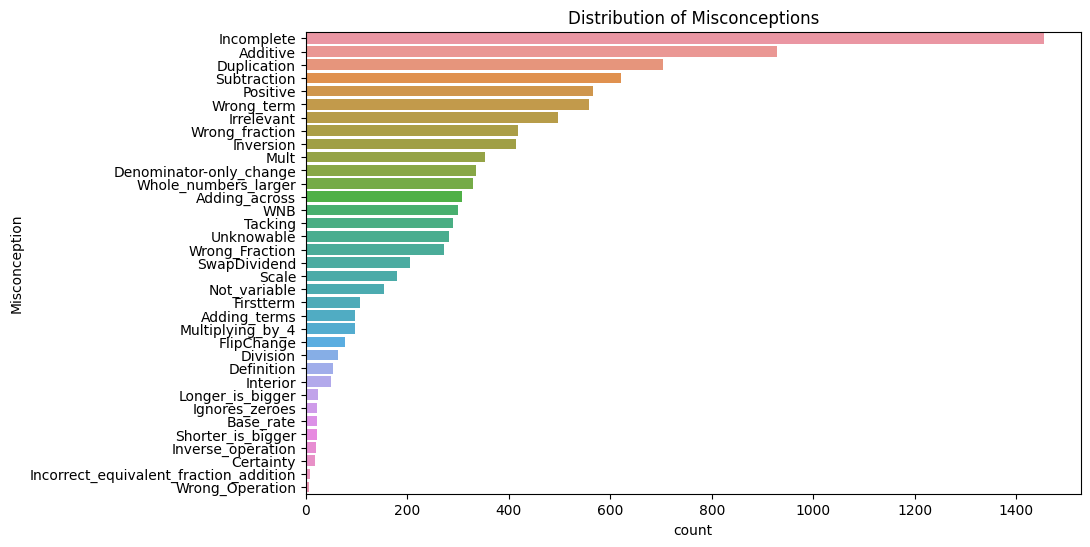

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

labeled = train[~train["Misconception"].isna()]
plt.figure(figsize=(10,6))
sns.countplot(y=labeled["Misconception"], order=labeled["Misconception"].value_counts().index)
plt.title("Distribution of Misconceptions")
plt.show()

Here, the most frequent misconception is Incomplete. Let’s examine how the Incomplete misconception appears and analyze its distribution across categories.

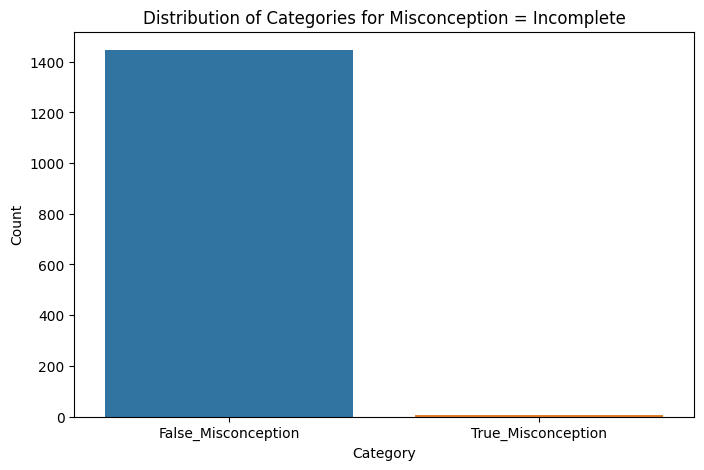

In [8]:
incomplete = train[train["Misconception"] == "Incomplete"]

plt.figure(figsize=(8,5))
sns.countplot(x=incomplete["Category"], order=incomplete["Category"].value_counts().index)
plt.title("Distribution of Categories for Misconception = Incomplete")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [9]:
incomplete = train[train["Misconception"] == "Incomplete"]

category_counts = incomplete["Category"].value_counts()
print(category_counts)

Category
False_Misconception    1446
True_Misconception        8
Name: count, dtype: int64


Most Incomplete misconceptions are labeled False_Misconception, with only a few True_Misconception entries, which is logical

**Examine Top Questions and Answers (False_Misconception) for Incomplete**

Now, we focus on the top questions and top answers that are labeled as False_Misconception within the Incomplete misconception.

This helps us understand which questions students commonly get wrong without it being a true misconception and what specific answers are incorrect, providing insights for feature analysis and modeling.

In [10]:
incomplete_false = incomplete[incomplete["Category"] == "False_Misconception"]
top_ids = incomplete_false["QuestionId"].value_counts().head(10).index
top_questions = incomplete_false[incomplete_false["QuestionId"].isin(top_ids)][["QuestionId", "QuestionText"]].drop_duplicates()

for i, row in top_questions.iterrows():
    print(f"QuestionId: {row['QuestionId']}\nQuestionText: {row['QuestionText']}\n")

QuestionId: 31772
QuestionText: What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]

QuestionId: 31777
QuestionText: A box contains \( 120 \) counters. The counters are red or blue. \( \frac{3}{5} \) of the counters are red.
How many red counters are there?

QuestionId: 33471
QuestionText: A bag contains \( 24 \) yellow and green balls. \( \frac{3}{8} \) of the balls are yellow. How many of the balls are green?



In [11]:
incomplete_false = incomplete[incomplete["Category"] == "False_Misconception"]

for i, explanation in enumerate(incomplete_false["StudentExplanation"][:100], 1):
    print(f"{i}: {explanation}\n")

1: 9 triangles in total and 3 are not shaded and 6 are.

2: Because there are 3 triangles not shaded in.

3: Because there are 6 spaces shaded out of 9 which leaves 3 spaces unshaded

4: Because three pieces are not shaded in

5: I think this because if the triangle is shading out of 9,and 3 are left,it has to be 3 over 9.

6: Only three is not shaded in and there is 9 in total.

7: The holder is 6 and is only 1 6 holder

8: There are 9 triangles and 3 are not shaded .you can not simplify three nineths so that is the answer

9: There are 9 triangles and 6 are shaded witch means there’s 3 non shaded

10: There are 9 triangles in totak and 3 are not shaded and 6 are.

11: because there are 6 triangles shaded and there are 9 all together

12: i think this because if the triangle is shading out of 9,and 3 are left it has to be 3 over 9

13: only three is not shaded in and there is 9 in toatle

14: there are 6 spaces shaded out of 9 which leaves 3 spaces unshaded

15: there are 6 spaces sha

We notice that many answers are exactly the same or very similar, which shows that students either express the same idea in different ways or may be copying each other.

**Analyse categorical features :**

**Category distribution**

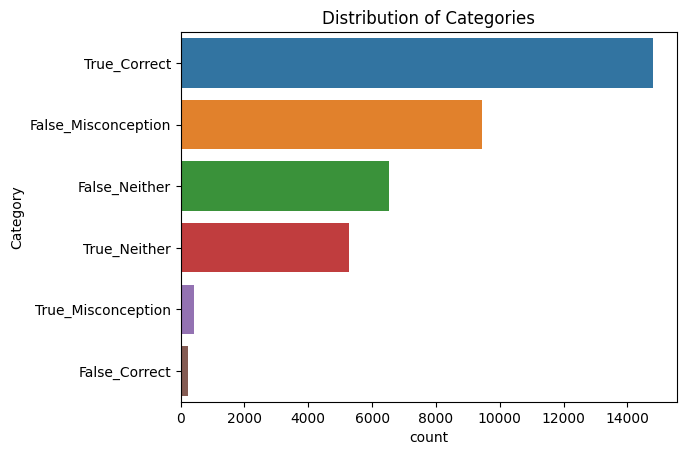

In [12]:
sns.countplot(y=train["Category"], order=train["Category"].value_counts().index)
plt.title("Distribution of Categories")
plt.show()

**Proportion of Correct vs Incorrect Responses**

Correct
Correct      55.782647
Incorrect    44.217353
Name: proportion, dtype: float64


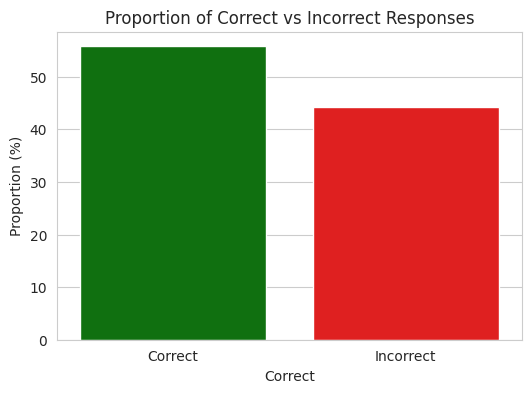

In [13]:
train['Correct'] = train['Category'].apply(lambda x: 'Correct' if 'True' in x else 'Incorrect')

proportions = train['Correct'].value_counts(normalize=True) * 100
print(proportions) 

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=proportions.index, y=proportions.values, palette=['green','red'])
plt.ylabel("Proportion (%)")
plt.title("Proportion of Correct vs Incorrect Responses")
plt.show()


The bar plot shows a roughly balanced distribution of correct and incorrect responses.

**another type of visualization : static bar chart**

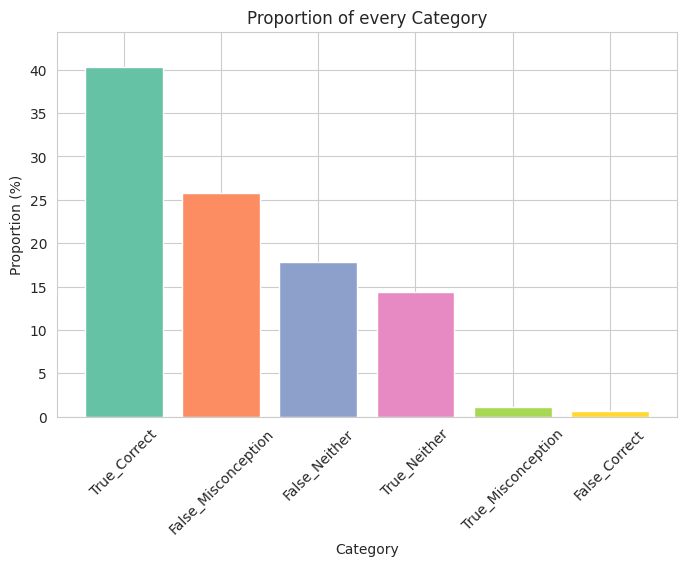

In [14]:
category_counts = train['Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
plt.bar(category_counts.index, category_counts.values, color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f'])
plt.ylabel("Proportion (%)")
plt.xlabel("Category")
plt.title("Proportion of every Category")
plt.xticks(rotation=45)
plt.ylim(0, max(category_counts.values)*1.1)  
plt.show()

The visualization shows that the majority of responses are True_Correct at almost 40%, while a small minority of responses are True_Misconception and False_Correct.

**Combined Analysis: Correct/Incorrect vs Misconception**

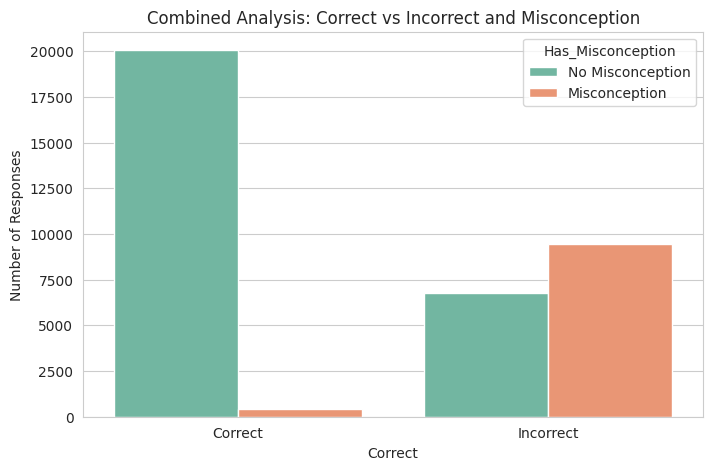

In [15]:
train['Correct'] = train['Category'].apply(lambda x: 'Correct' if 'True' in x else 'Incorrect')
train['Has_Misconception'] = train['Category'].apply(lambda x: 'Misconception' if 'Misconception' in x else 'No Misconception')

plt.figure(figsize=(8,5))
sns.countplot(x='Correct', hue='Has_Misconception', data=train, palette=['#66c2a5','#fc8d62'])
plt.title("Combined Analysis: Correct vs Incorrect and Misconception")
plt.ylabel("Number of Responses")
plt.show()

**MC_Answer distribution**

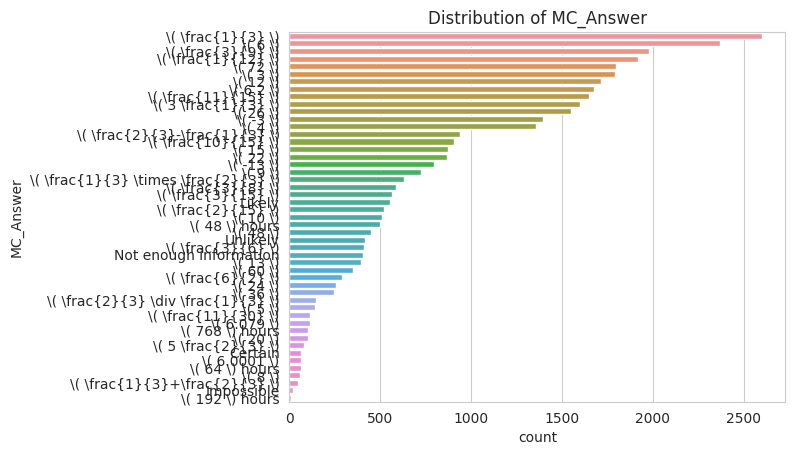

In [16]:
sns.countplot(y=train["MC_Answer"], order=train["MC_Answer"].value_counts().index)
plt.title("Distribution of MC_Answer")
plt.show()

The most selected answer for this question is 1/3.
This suggests that the question might be relatively easy for students, assuming 1/3 is the correct answer.
If 1/3 is incorrect, it could instead indicate a common misconception shared by many students.

We also notice that MC_Answer is written in LaTeX format.
This poses two options for preprocessing:

* Convert LaTeX to standard numeric/text form so that conventional models can understand it.

* Use models that can handle LaTeX directly, such as MathBERT, MathGPT, or DeepSeekMath, which are designed for mathematical text.

**explications length distribution**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


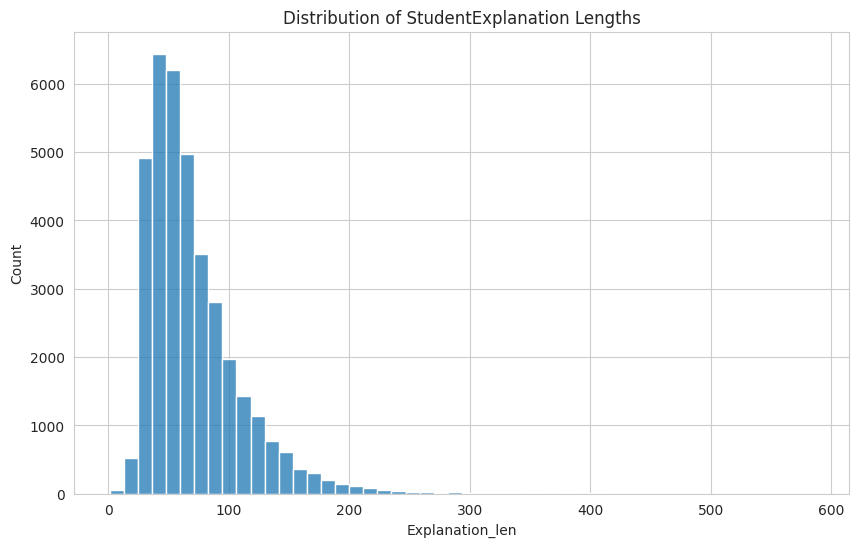

In [17]:
train['Explanation_len'] = train['StudentExplanation'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.histplot(train['Explanation_len'], bins=50)
plt.title("Distribution of StudentExplanation Lengths")
plt.show()

The distribution of StudentExplanation length is positively skewed, indicating that most students write medium-length explanations (typically 30–120 characters).
This provides useful information that can be leveraged for feature engineering or modeling, such as incorporating explanation length as a predictive feature 

**Explanation Length vs Category**

Let's check if there's a link between how long a student’s explanation is and whether their answer is correct.
Maybe longer explanations mean better understanding — or maybe they show confusion and lead to more mistakes.

In [18]:
train["Explanation_len"] = train["StudentExplanation"].apply(lambda x: len(str(x)))
longest_explanations = train.sort_values(by="Explanation_len", ascending=False)

longest_explanations[["StudentExplanation", "Explanation_len", "Category"]].head(10)


,StudentExplanation,Explanation_len,Category
17022,"In order to do this, you will have to turn the...",586,True_Correct
30422,a - subtract b if c is positive elif it is neg...,521,True_Neither
18086,"to work out this question, you only really nee...",486,True_Correct
35319,i think this because: this is an example of in...,415,True_Correct
25002,to make both fractions equal in to do the equa...,405,True_Correct
12977,Do a criss-cross. \n10 x 9 = 15 x A\nWe know t...,404,True_Correct
24876,the answer is 11/15. although it may look like...,385,True_Correct
31401,we must do (-8) - (-5) which can also be viewe...,385,True_Misconception
570,"Because there is 9 triangles in total, and thr...",376,True_Correct
6014,I did the keep it change it flip it rule. You ...,365,True_Correct


Below are some of the longest explanations from the dataset.
Most of them belong to the “True_Correct” category, suggesting that longer, more detailed explanations may often come from students who understand the concept well.

However, since a few long explanations also appear in other categories (like True_Neither or True_Misconception), length alone is not a perfect indicator of correctness — it simply shows that students who reason more tend to write longer answers.

In [19]:
shortest_explanations = train.sort_values(by="Explanation_len", ascending=True)
shortest_explanations[["StudentExplanation", "Explanation_len", "Category"]].head(20)

,StudentExplanation,Explanation_len,Category
30752,d,1,True_Neither
30133,-3,2,True_Neither
29403,??,2,False_Neither
30776,d.,2,True_Neither
35669,b.,2,False_Neither
2961,3/9,3,False_Neither
2960,3/9,3,False_Neither
29315,-13,3,False_Neither
29316,-13,3,False_Neither
29317,-13,3,False_Neither


In contrast, almost all very short explanations (length ≤ 6) belong to the “Neither” category.
This suggests that overly brief answers often lack sufficient reasoning and are less likely to be correct.

**Box Plot for better visualisation**

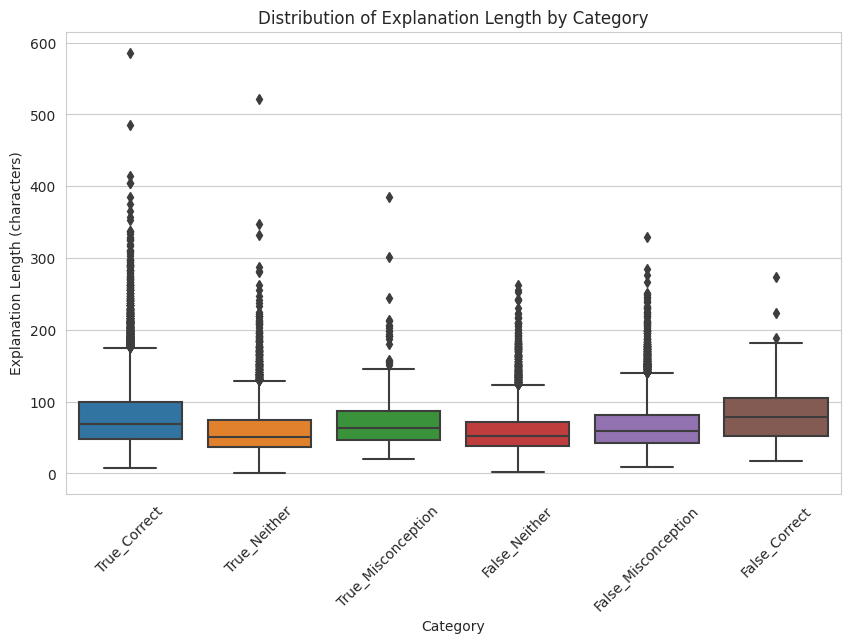

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Category", y="Explanation_len", data=train)
plt.title("Distribution of Explanation Length by Category")
plt.ylabel("Explanation Length (characters)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

**Observations**

- The length of the explanations varies across categories.
- We previously noticed that students who gave **True_Correct** answers tend to write slightly longer explanations than others.  
- Additionally, the True_Neither and False_Neither categories have shorter explanations on average, which may indicate a lack of reasoning or understanding.
- The presence of many outliers shows that some students write very long explanations regardless of the answer type.
- Overall, there is a **slight positive correlation** between **explanation length** and **correctness**, but **length alone is not enough** to determine actual understanding.


Adding **explanation length** as a feature in feature engineering **may help capture understanding**, as longer explanations can sometimes indicate better reasoning. However, in my case, I will use **embeddings** that already encode the semantic content and partially the structure of the text. In other words, embeddings **implicitly take length into account**: a longer text often produces a vector with **richer content** and a **different structure**. Therefore, length is not completely lost and there is no need to include it as a separate feature, since embeddings capture the relevant information more effectively than a simple length measure.


**Displaying Answers per Question**

In [21]:
from IPython.display import display, Math, Latex

tmp = train.groupby(['QuestionId','MC_Answer']).size().reset_index(name='count')
tmp['rank'] = tmp.groupby('QuestionId')['count'].rank(method='dense', ascending=False).astype(int) - 1
tmp = tmp.drop('count',axis=1)
tmp = tmp.sort_values(['QuestionId','rank'])

Q = tmp.QuestionId.unique()
for q in Q:
    question = train.loc[train.QuestionId==q].iloc[0].QuestionText
    choices = tmp.loc[tmp.QuestionId==q].MC_Answer.values
    labels="ABCD"
    choice_str = " ".join([f"({labels[i]}) {choice}" for i, choice in enumerate(choices)])
    
    print()
    display(Latex(f"QuestionId {q}: {question}") )
    display(Latex(f"MC Answers: {choice_str}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Some questions share semantic meaning (e.g., fractions, equations, geometry).
Using a SentenceTransformer, semantically similar questions are close in embedding space.

We can also create a QuestionType feature (e.g., addition, subtraction, fraction) to capture concept understanding, helping the model predict answers more accurately.

Why this is useful:

* Students who perform well on one question type are likely to succeed on other questions of the same type.

* This feature captures conceptual understanding and can improve predictive models.

**preprocessing**

**QuestionText & MC_Answer cleaning :**

As we noticed in the EDA phase , questions and multiple-choice answers are written with LaTeX code, which can be confusing for the model. To make the model better understand the text, we need to clean the LaTeX expressions and image placeholders.

In [22]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r'\\\(|\\\)|\\\[|\\\]', ' ', text)
    text = re.sub(r'\\frac\{(\d+)\}\{(\d+)\}', r'\1/\2', text)
    text = re.sub(r'\[Image:\s*(.*?)\]', r'\1', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train["CleanedQuestion"] = train["QuestionText"].apply(clean_text)
train["CleanedMcAnswer"] = train["MC_Answer"].apply(clean_text)


In [23]:
i = 0

print("🔹 Original")
print("Q:", train.loc[i, "QuestionText"])
print("A:", train.loc[i, "MC_Answer"])
print("\n🔹 Cleaned")
print("Q:", train.loc[i, "CleanedQuestion"])
print("A:", train.loc[i, "CleanedMcAnswer"])


🔹 Original
Q: What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]
A: \( \frac{1}{3} \)

🔹 Cleaned
Q: What fraction of the shape is not shaded? Give your answer in its simplest form. A triangle split into 9 equal smaller triangles. 6 of them are shaded.
A: 1/3


**cleaning misconception feature :**

As we have missing values in the `Misconception` column, we need to replace them with something else so that the model can handle them properly. Here, we choose to replace them with `"None"`.

In [24]:
train['Misconception'] = train['Misconception'].fillna('None')

In [25]:
train['Misconception'].isna().sum()

0

**Cleaning row_id :**

As we can identify rows by their index , there is no need to keep the row_id 

In [26]:
train = train.drop(columns=['row_id'])